# Generate masks with different background

In [147]:
import random
from pathlib import Path
import torch
from torch.nn import Module,Linear
from torch.nn.utils import spectral_norm
from torch.nn.functional import interpolate, relu,tanh
import torch.nn.functional as F
from torch.nn import UpsamplingNearest2d,Conv2d
from torch.nn.utils import spectral_norm
from torch.distributions import Normal
import torch
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm
import utils
import glob
from torchvision.io import read_image
import os
from torchvision.models import vgg16
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as im
import imageio
import SimpleITK as sitk

In [72]:
## I think there is supposed to be a different training data folder but I cant find where to download it
DATA_DIR = r"C:\Users\20191679\Documents\Master\CS_image_analysis\TrainingData"


In [6]:
from torch.utils.data import DataLoader

IMAGE_SIZE = [64, 64]  # images are made smaller to save training time
BATCH_SIZE = 32
NO_VALIDATION_PATIENTS=5

In [8]:
patients = [
    path
    for path in glob.glob(DATA_DIR+r"\p*[0-9]")
]

partition = {
    "train": patients[:-NO_VALIDATION_PATIENTS],
    "validation": patients[-NO_VALIDATION_PATIENTS:],
}

In [9]:
dataset = utils.ProstateMRDataset(partition["train"], IMAGE_SIZE)

In [10]:
dataloader = DataLoader(
    dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    drop_last=True,
    pin_memory=True,
)

In [40]:
img,seg=next(iter(dataloader))
print(seg.size())

torch.Size([32, 1, 64, 64])


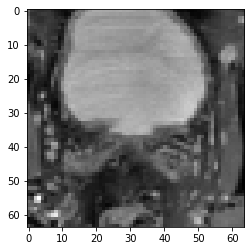

In [30]:
plt.imshow(img[3,0,:,:], cmap='gray')

In [115]:
# seg2=np.arange(131072)
# seg2=np.reshape(seg2,(32,1,64,64))
seg2=np.zeros(np.shape(seg))
for pt in range(32):
    for i in range(64):
        for j in range(64):
            if seg[pt,0,i,j] == 0:
                seg2[pt,0,i,j] = img[pt,0,i,j]
                
            else:
                seg2[pt,0,i,j] = torch.max(img[pt,0,:,:])

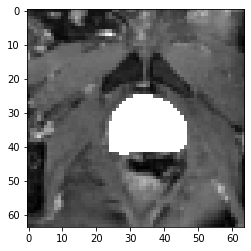

In [122]:
plt.imshow(seg2[10,0,:,:], cmap='gray')

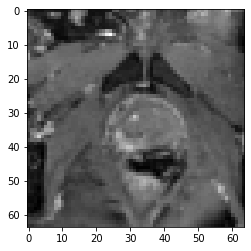

In [123]:
plt.imshow(img[10,0,:,:],cmap='gray')

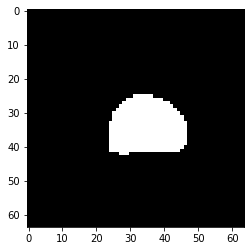

In [124]:
plt.imshow(seg[10,0,:,:], cmap='gray')

### Try differently because dimensions dont really match

In [82]:
patient_nrs_list = ['p102','p107', 'p108', 'p109', 'p115', 'p116', 'p117', 
                     'p120', 'p125', 'p127', 'p129', 'p133']

patient_nr = patient_nrs_list[1] #pick any index up to 14 for that patient
file_p_mr = DATA_DIR + '\{}\mr_bffe.mhd'.format(patient_nr)  # example of patient 107 input MR image
file_p_mask = DATA_DIR +'\{}\prostaat.mhd'.format(patient_nr) # example of patient 107 segmentation mask

# Convert so images can be inspected
readable_mr = imageio.imread(file_p_mr)
readable_mask = imageio.imread(file_p_mask)

5291


In [ ]:
for pt in range(len(patient_nrs_list)):
    patient_nr = patient_nrs_list[pt] 
    mask2=np.zeros(np.shape(readable_mask))
    
    file_p_pt = DATA_DIR + '\{}'.format(patient_nr)
    file_p_mr = DATA_DIR + '\{}\mr_bffe.mhd'.format(patient_nr)  # example of patient 107 input MR image
    file_p_mask = DATA_DIR +'\{}\prostaat.mhd'.format(patient_nr) # example of patient 107 segmentation mask


    readable_mr = imageio.imread(file_p_mr)
    readable_mask = imageio.imread(file_p_mask)
                
    for i in range(86):
        for j in range(333):
            for k in range(271):
                if readable_mask[i,j,k] == 0:
                    mask2[i,j,k] = readable_mr[i,j,k]

                elif readable_mask[i,j,k] == 1:
                    mask2[i,j,k] = np.max(readable_mr[i,:,:])
    mask_img = sitk.GetImageFromArray(mask2)
    img_name= file_p_pt + 'prostaat_bg.mhd'
    sitk.WriteImage(mask_img,img_name)

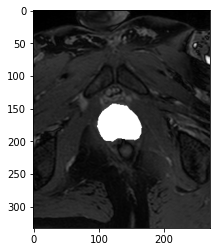

In [140]:
plt.imshow(mask2[40,:,:], cmap='gray')

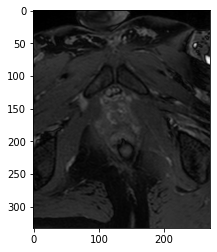

In [103]:
plt.imshow(readable_mr[40,:,:], cmap= 'gray')

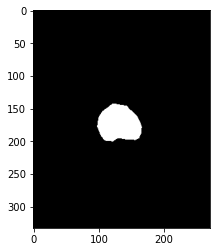

In [92]:
plt.imshow(readable_mask[40,:,:
                        ], cmap='gray')